# Visualizations 

Encoding: 

<p> C2 - 
    * 0: <60     
    * 1: >60 
<p> C4 - 
    * 0: <23     
    * 1: <60      
    * 2: <93      
    * 3: >93  
<p> C1 - 1 for each number from 0 to 101



In [1]:
# IMPORTS 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import time 

In [2]:
def c2(df, rv=1):
    if rv == 1:
        if( df < 60 ):                  return [1,0]  
        elif( df >= 60 ):               return [0,1]      
    elif rf==2: 
        if( df < 60 ):                  return 0
        elif( df >= 60 ):               return 1
def c4(df, rv=1):
    
    if rv == 1:
        if( df < 23 ):                  return [1,0,0,0]  #0
        elif( df >= 23 and df < 60 ):   return [0,1,0,0]  #1
        elif( df >= 60 and df < 93 ):   return [0,0,1,0]  #2
        elif( df >= 93 ):               return [0,0,0,1]  #3    
    elif rv==2: 
        if( df < 23 ):                  return 0
        elif( df >= 23 and df < 60 ):   return 1
        elif( df >= 60 and df < 93 ):   return 2
        elif( df >= 93 ):               return 3
    # elif rf==3: 
    #     if  ( df == [1,0,0,0] ):        return 0 
    #     elif( df == [0,1,0,0] ):        return 1
    #     elif( df == [0,0,1,0] ):        return 2  
    #     elif( df == [0,0,0,1] ):        return 3  
def cN(df):
    global nout
    listofzeros = [0] * nout
    dfIndex = df #//nRange
    # print('{} and {}', (df,dfIndex))
    if    0 < dfIndex < nout:   listofzeros[dfIndex] = 1
    elif  dfIndex < 0:          listofzeros[0]       = 1
    elif  dfIndex >= nout:      listofzeros[nout-1]  = 1
    
    return listofzeros 

def cc(x, rv=1):
    global nout
    if   dType == 'C4':  nout = 4;   return c4(x, rv);
    elif dType == 'C1':  nout = 102; return cN(x); 
    elif dType == 'C2':  nout = 2;   return c2(x, rv);

# Read

In [3]:
start = time.time()
# 1- Get data: 
path = outfile = '../../data/FRFLO/datasc.csv' 
# path = outfile = '../../data/FLALL/datasc.csv' 
dst  =  pd.read_csv( tf.gfile.Open(path), sep=None, skipinitialspace=True,  engine="python")
elapsed_time = float(time.time() - start)
print(elapsed_time)

5.238299608230591


In [4]:
# dst.describe()
# dst.info()
# dst.shape 
# dst.isnull().any() 

# vis Basic

In [5]:
Y  = dst.loc[:,'FP'].as_matrix().tolist()
X  = dst.loc[:, 'M'].as_matrix().tolist()
a = 1
if a == 0: 
    plt.hist(Y)
else: 
    plt.xlabel('M')
    plt.ylabel('FP')
    plt.grid(True)
    N = 2 #50
    colors = np.random.rand(N)
    area = 1 #np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
    #plt.plot(X, Y, color='blue', marker='o', label='FP Comp')
    #plt.plot(X, Y, 'bo', label='FP Comp')
    plt.scatter(X,Y, s=6, c='b', marker='o', cmap=None, norm=None, vmin=60, vmax=101, alpha=None,  label='FP Comp')
    plt.legend()

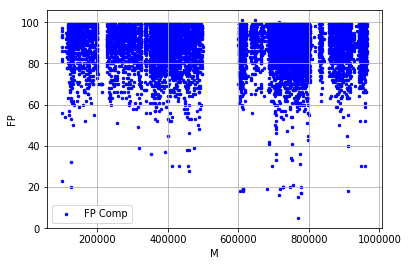

In [6]:
plt.show()

# vis 1 - Cx An.
color - FP - legend <br>
y = Quantity of the comp Cx -- <br>
x = M <br>
<br><br>

clean up - drop the M that does not contain Cx 

In [14]:
#*********************************************************************
# paint 
#*********************************************************************  
def paint_plot(data,  component ,clase,m="o"):
    colors = list()
    palette = {0: "red", 1: "green", 2: "blue"}
    x = data[ data['FPP'] == clase ]["M"]
    y = data[ data['FPP'] == clase ][component]
    plt.scatter(x, y , edgecolors='k',s=50, alpha=0.9, marker=m,label=str(clase))
    
def paint(data, component):
    #color=plt.rainbow(np.linspace(0,1,nn))
    for i in rr: 
        #c=next(color)
        paint_plot(data, component, i)
    plt.legend()
    plt.show()

In [22]:
com = "160102" #c922 - 160102 - 121 dipropylene glycol 
com = "131104" #c738 - 131104 - 44  hexenol cis 3 
# com = "100023"
# com = "100025"

In [8]:
# tags_data.isnull().any()
# tags_data.dopna()

In [9]:
# read components file ... 
path = outfile = '../../data/FRFLO/datac.csv' 
# path = outfile = '../../data/FLALL/datasc.csv' 
col_df = pd.read_csv(path, index_col=2, sep=',', usecols=[0,1,2,3])    

In [17]:
# col_df.describe()
# col_df.head()

In [23]:
col_df.loc[int(com)]

cc     c738
tot    5255
fp       44
Name: 131104, dtype: object

In [12]:
# encode the FP 
dType = "C4"
if   dType == 'C4':  nn = 4
elif dType == 'C1':  nn = 100
elif dType == 'C2':  nn = 2
rr = range(nn)

# dst.insert(2, 'FPP', dst['FP'].map(lambda x: cc(x)))  
dst["FPP"] = dst['FP'].map(lambda x: cc(x, rv=2))

In [24]:
# drop all the columns except the index, 2 and the com 
dst.columns[2:4]
dstt = dst[["M", "FPP", com]]
dst.head()
dstt = dstt.dropna()
dstt

,M,FPP,131104
1,100566,2,1.500000e-06
3,100669,1,1.000000e-03
11,108895,2,2.500000e-03
12,109267,1,2.568000e-06
15,112113,2,1.000000e-04
18,113010,3,1.666667e-03
21,113382,2,2.070350e-04
25,114722,3,2.800000e-03
28,115687,3,1.500000e-04
29,115689,2,2.500000e-04


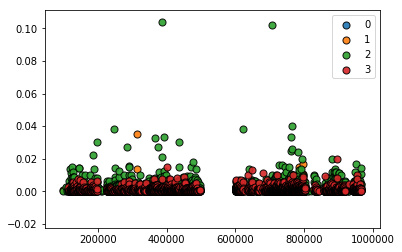

In [25]:
paint(dst, com)

In [16]:
nn

4

# vis 2 - All C
color - FP - legend <br>
y = Cantidad of the c Cx -- <br>
x = Cx <br>
<br><br>
something interesting would be to know what is the amount that is normally use for each component... *dst.describe()d

# exp. 
1. get components used in each formulation 
2. replace this numbers for 1 -> Embeddings

In [17]:
dst.describe()

,M,FP,100023,100025,100028,100034,100041,100060,100061,100070,...,964392,972612,978488,982437,982440,983685,983686,996041,998063,998168
count,9610.000000,9610.000000,3.000000e+00,17.000000,6.680000e+02,1.940000e+02,219.000000,52.000000,4.000000,3.820000e+02,...,2.000000,3.000000e+00,1.340000e+02,188.000000,3.000000,63.000000,67.000000,1.000,1.800000e+01,1.000
mean,601962.775963,87.214256,6.307000e-06,0.000797,5.443630e-04,5.639133e-04,0.005630,0.000631,0.000474,4.026940e-04,...,0.006761,2.169000e-11,5.467359e-04,0.390481,0.000419,0.003023,0.000618,0.075,7.924552e-04,0.001
std,242149.031945,10.047519,7.728967e-06,0.000373,1.941300e-03,2.434424e-03,0.006617,0.000638,0.000109,4.481518e-03,...,0.000723,3.750758e-11,2.247094e-03,0.167917,0.000212,0.011062,0.000905,NaN,1.766641e-03,NaN
min,100456.000000,5.000000,2.110000e-07,0.000005,1.000000e-14,3.570000e-10,0.000050,0.000014,0.000364,2.100000e-12,...,0.006250,0.000000e+00,1.260000e-12,0.082000,0.000294,0.000011,0.000039,0.075,1.200000e-11,0.001
25%,394230.000000,82.000000,1.960500e-06,0.000528,5.250000e-05,5.000000e-07,0.001464,0.000256,0.000432,5.700000e-07,...,0.006506,3.500000e-14,1.515000e-06,0.253300,0.000297,0.000465,0.000200,0.075,3.800000e-06,0.001
50%,704052.000000,89.000000,3.710000e-06,0.001000,1.764710e-04,3.725000e-06,0.003182,0.000455,0.000455,8.715000e-06,...,0.006761,7.000000e-14,1.835000e-05,0.387500,0.000300,0.001250,0.000375,0.075,6.400000e-06,0.001
75%,777086.750000,95.000000,9.355000e-06,0.001000,5.000000e-04,1.025860e-04,0.007314,0.000700,0.000497,6.670000e-05,...,0.007017,3.253500e-11,1.040000e-04,0.530500,0.000482,0.002034,0.000500,0.075,4.411135e-04,0.001
max,963939.000000,101.000000,1.500000e-05,0.001111,4.285714e-02,3.000000e-02,0.047059,0.002857,0.000625,8.571429e-02,...,0.007273,6.500000e-11,1.500000e-02,0.729500,0.000664,0.088571,0.005000,0.075,7.001520e-03,0.001


In [31]:
total = len(dst)
com = "100023"
dst[com].describe()
# dst[com].isnull().any() 
sum(pd.isnull(dst[com]))
total

9610

In [86]:
com = "160102" #c922 - 160102 - 121 dipropylene glycol 
com = "131104" #c738 - 131104 - 44  hexenol cis 3 
com = "100023"
total - sum(pd.isnull(dst[com]))

3

In [87]:
# test to replace all the decimals for 1. 

pd.isnull(dst[com])
type(pd.notnull(dst[com]))
# pd.notnull(dst[com])

# dst[com][pd.isnull(dst[com]) == False] 
# dst[com][pd.isnull(dst[com]) == False] = 1                               # warning! ??? 
# No warning: # .loc[row_index,col_indexer] = value instead

# pd.isnull(dst.iloc[:,3])
# dst[com][pd.isnull(dst.iloc[:,2]) == False]
# type(dst[com][pd.isnull(dst.iloc[:,2]) == False])
# dst.iloc[dst[com][pd.isnull(dst.iloc[:,2]) == False].index  , 2 ] = 1    # GOOD ONE 

#dst.iloc( [pd.isnull(dst.iloc[:,4]) == False])
# .loc[row_index,col_indexer] = value instead

pandas.core.series.Series